***
# ~a copy of IGCM.pro and IGCM_olr.pro
***
### <font color=black> effectively anything you want to plot in lat_v_lon space! </font>


> #### FYI --- 
...this notebook reads in a function to plot effectively any 2D contour plot, with an optimized plot size for lat v. lon plots. Have fun! </font>


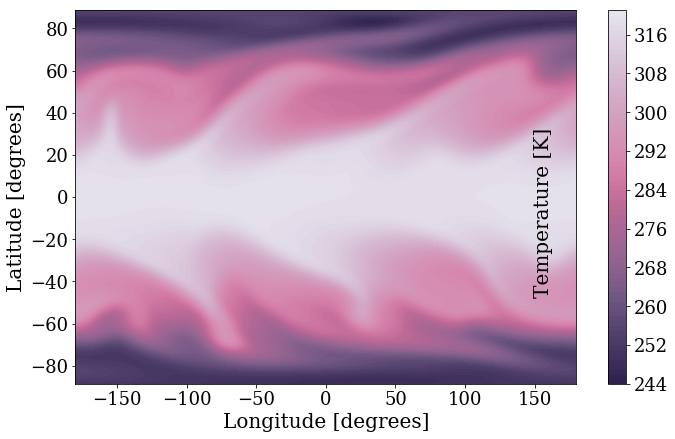

In [4]:
import numpy as np
import pickle

import sys
#print (sys.argv)
sys.path.insert(0,'Main_Functions/') 

from PLOTS_latvlon import *

import matplotlib
%matplotlib inline

#######################################
#     NECESSARY USER INPUT BELOW!     #
#######################################

# put the main path to your runs here
path    = '/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname = 'EARTH_T63'

# what file do you want to load in to plot?? and what projection? streamlines?
filen  = 'fort26.txt'
ortho  = False
stream = False  #doesn't work right now!

# you can adjust the central longitude (and latitude for orthographic projections)
loncenter = 0.0
latcenter = 45.0

# if you picked fort.26, you need to select U (3) ,V (4),or T (5) and the level!
ind = 5
lev = 29


# colormaps! you can use the included function to select the 'base' colormaps 
# OR you can select your own (better ones) by commenting this out and putting in your own here!
# for example, I LOVE this one: np.loadtxt("ScientificColourMaps5/acton/acton.txt")
#cmap_in = typical_colorbars('tp')  # options are currently: lw, sw, uw, vw, tp (self explanatory I hope!)
cmap_in = np.loadtxt("ScientificColourMaps5/acton/acton.txt")

# axis labels, of course!
x_lab = 'Longitude [degrees]'
y_lab = 'Latitude [degrees]'
c_lab = 'Temperature [K]'

# do you want to save the plot (why not!?) and what do you want to name it?!
savet = True
saven = path + runname + '/TEST.png'
trpnt = True  # if true, transparent background. SET FALSE FOR MAKING GIFS!

# various colorbar and contour level options...
cbarL = 0        # useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM = 0        # useful for multiple plots --- force upper limit of colorbars. SET 0 otherwise
ex    = 1        # if you want to extend the colorbar. Default is 1 for temperature
cbar_even = True # useful for Winds, center colorbar so that 0 is middle.
ncolors   = 0    # 0,sets so that each color step =1 in whatever units. otherwise =multiple of that


# --------------------------------------------------------------------------------
# --------------------------------------------------------------------------------
# --------------------------------------------------------------------------------
# --------------------------------------------------------------------------------
# BELOW is the basics of this plotting routine, you shouldn't need to change anything
# unless you wanna change units or something
# ... hopefully. 

lon_load = pickle.load(open(path + runname + '/pres_lon_lat.txt', 'rb'))[1]
lat_load = pickle.load(open(path + runname + '/pres_lon_lat.txt', 'rb'))[2]
zfl_load = pickle.load(open(path + runname + '/' + filen, 'rb'))

if 'fort26.txt' in filen and stream==False:
    zfl_load = zfl_load[lev,:,:,ind]

if 'fort26.txt' in filen and stream==True:
    uwd_load = zfl_load[lev,:,:,3]
    vwd_load = zfl_load[lev,:,:,4]
    zfl_load = np.sqrt(uwd_load**2.+vwd_load**2.)
# ----------------------------------
# calculates color bar levels...
cbar_levs=  gen_levels(zfl_load,ind,filen,cbar_even,cbarL,cbarM,ncolors,ex)    
# ----------------------------------
if ortho==False:
    # centers then shifts....
    zfl_load, lon_load = shift_center(zfl_load,loncenter,latcenter,lon_load,lat_load)
    # ----------------------------------
    lat_v_lon_plot(lon_load,lat_load,zfl_load,cbar_levs,cmap_in,x_lab,y_lab,c_lab,savet,saven,trpnt)
    
if ortho==True:
    lat_v_lon_ortho(lon_load,lat_load,zfl_load,loncenter,latcenter,cbar_levs,cmap_in,x_lab,y_lab,c_lab,savet,saven,trpnt)
    